In [1]:
import numpy as np
import lsst.sims.featureScheduler as fs
from lsst.sims.featureScheduler.observatory import Speed_observatory
import healpy as hp
%matplotlib inline

In [2]:
survey_length = 2  # days
# Define what we want the final visit ratio map to look like
survey_filters = ['u']
surveys = []

for f in survey_filters:
    bfs = []
    bfs.append(fs.Slewtime_basis_function_cost(filtername=f))
    bfs.append(fs.Visit_repeat_basis_function_cost(filtername=f,survey_filters=survey_filters))
    bfs.append(fs.Target_map_basis_function_cost(filtername=f, survey_filters=survey_filters))
    bfs.append(fs.Normalized_alt_basis_function_cost(filtername=f))
    bfs.append(fs.Hour_angle_basis_function_cost())
    bfs.append(fs.Depth_percentile_basis_function_cost())
    weights = np.array([5,1,1,1,1,1])
    surveys.append(fs.Simple_greedy_survey_fields_cost(bfs, weights, filtername=f, block_size= 5))

scheduler = fs.Core_scheduler_cost(surveys)
observatory = Speed_observatory()
observatory, scheduler, observations = fs.sim_runner(observatory, scheduler,
                                                     survey_length=survey_length,
                                                     filename='pairs_survey.db', delete_past=True)

/Users/elahesadatnaghib/Dropbox/Graduate/Research/Princeton/LSSTscheduler/LSST-Code/PythonCode/sims_featureScheduler/python/lsst/sims/featureScheduler/features.py:405: RuntimeWarning: invalid value encountered in arccos
  self.ha_limit = np.arccos(cosha)*12/np.pi
/Users/elahesadatnaghib/Dropbox/Graduate/Research/Princeton/LSSTscheduler/LSST-Code/PythonCode/sims_featureScheduler/python/lsst/sims/featureScheduler/features.py:359: RuntimeWarning: invalid value encountered in arccos
  self.lmst_max = np.arccos(cos_ha) + self.ra
/Users/elahesadatnaghib/Dropbox/Graduate/Research/Princeton/LSSTscheduler/LSST-Code/PythonCode/sims_featureScheduler/python/lsst/sims/featureScheduler/features.py:449: RuntimeWarning: invalid value encountered in greater
  self.feature[np.where(self.feature > time_to_twilight)] = time_to_twilight
/Users/elahesadatnaghib/Dropbox/Graduate/Research/Princeton/LSSTscheduler/LSST-Code/PythonCode/sims_featureScheduler/python/lsst/sims/featureScheduler/features.py:452: Runt

progress = 50.3%

/Users/elahesadatnaghib/Dropbox/Graduate/Research/Princeton/LSSTscheduler/LSST-Code/PythonCode/sims_utils/python/lsst/sims/utils/m5_flat_sed.py:64: RuntimeWarning: overflow encountered in power
  Tscale = expTime / 30.0 * np.power(10.0, -0.4*(musky - m5_flat_sed.msky[visitFilter]))


progress = 100.5%Completed 1425 observations


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


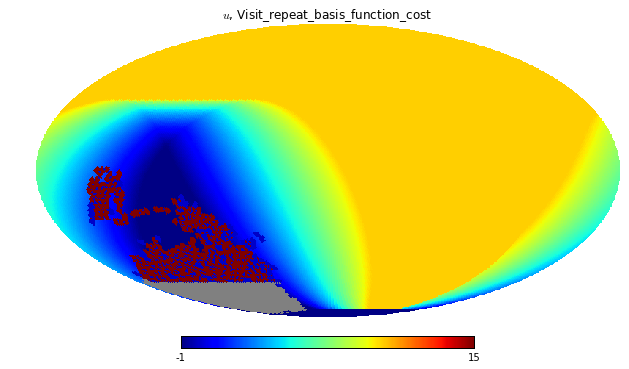

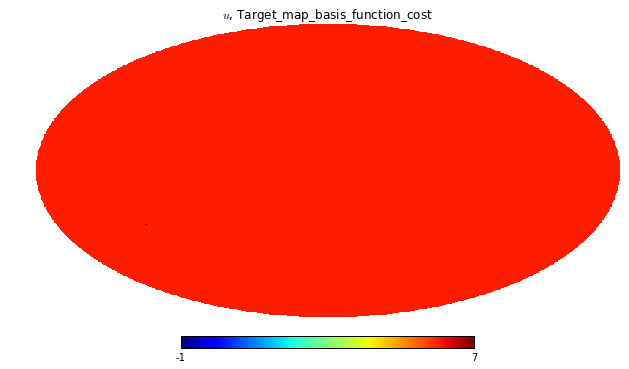

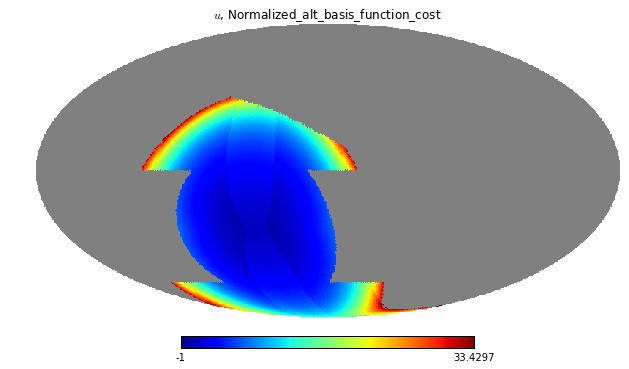

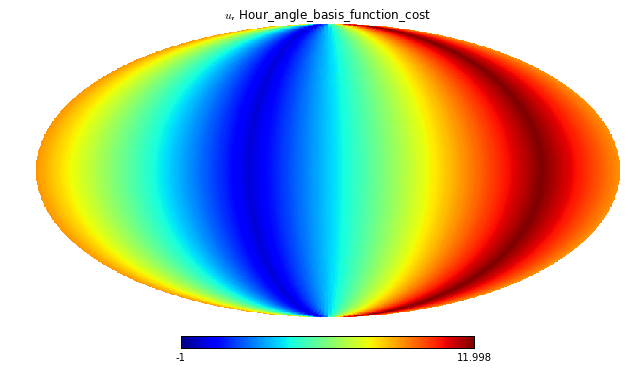

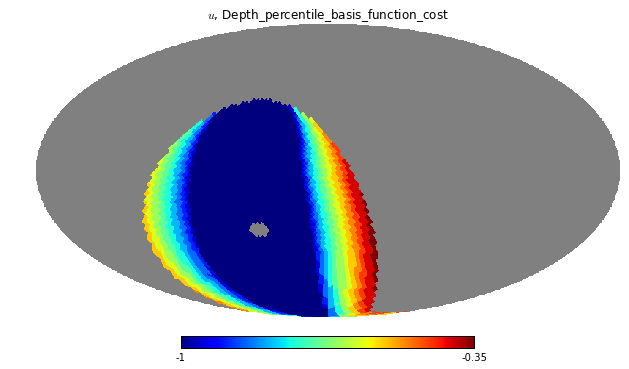

In [3]:

for fn, survey in zip(['u', 'g'], scheduler.surveys):
    for basis_function in survey.basis_functions:
        reward = basis_function()
        if np.size(reward) > 1:
            hp.mollview(reward, min=-1, title='$%s$, %s' % (fn, type(basis_function).__name__.split('.')[-1]))